In [1]:
# Credits: https://github.com/0rC0/MachineLearningForMedicalImages

In [5]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import csv
#from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
import nibabel as nib
from nilearn import plotting as plotting

In [26]:
flair_train_path = './Data/train/002_flair2t1_2mni_coreg_n4_brain.nii.gz'
wmh_mask_train_path = './Data/train/002_ples_lpa_mflair2t1_2mni_coreg_n4_thrp50_bin.nii.gz'
brain_mask_path = './Data/train/t1_coregWarped_n4_brain_mask.nii.gz'
t1_path = './Data/train/t1_coregWarped_n4_brain.nii.gz'

In [30]:
# flair = nib.load(flair_train_path).get_data()
wmh_mask = nib.load(wmh_mask_train_path).get_data()
brain_mask = nib.load(brain_mask_path).get_data()
t1 = nib.load(t1_path).get_data()
# Mean Normalize the data
nflair = flair / np.mean(flair[np.nonzero(flair)])
nt1 = t1 / np.mean(t1[np.nonzero(t1)])

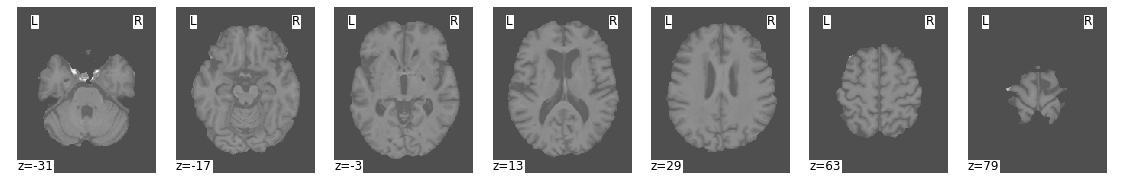

In [32]:
plotting.plot_anat(t1_path, display_mode = 'z', black_bg = False)

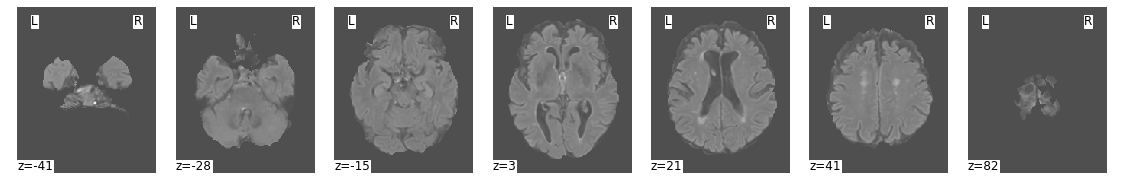

In [28]:
plotting.plot_anat(flair_train_path, display_mode = 'z', black_bg = False)

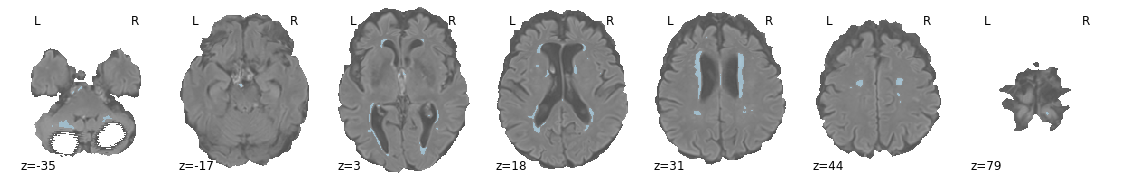

In [35]:
plotting.plot_roi(wmh_mask_train_path, flair_train_path, display_mode = 'z', cmap='Paired', black_bg = False)

In [63]:
flair_tissue = (nflair[np.nonzero((brain_mask == 1) & (wmh_mask == 0))])

In [64]:
t1_tissue = (nt1[np.nonzero((brain_mask == 1) & (wmh_mask == 0))])

In [65]:
flair_wmh = (nflair[np.nonzero(wmh_mask == 1)])
t1_wmh = (nt1[np.nonzero(wmh_mask == 1)])

In [66]:
# take len(wmh) of random data from tissues

In [68]:
IND=np.random.randint(np.shape(t1_tissue)[0], size=len(flair_wmh))
flair_tissue = flair_tissue[IND]
t1_tissue = t1_tissue[IND]

In [70]:
train_dataset = {'flair_tissue' : flair_tissue,
                't1_tissue' : t1_tissue,
                'flair_wmh': flair_wmh,
                't1_wmh' : t1_wmh}

In [73]:
train_df = pd.DataFrame.from_dict(train_dataset)


In [91]:
len(train_df)

4

In [85]:
train_df = train_df.transpose()
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16254,16255,16256,16257,16258,16259,16260,16261,16262,16263
flair_tissue,0.915960,0.536673,1.141133,1.030773,1.167980,1.507971,0.210379,1.325231,0.330272,0.977494,...,0.498479,1.368669,0.252602,1.171483,0.922906,1.410519,1.300536,0.000000,1.398923,1.149740
t1_tissue,1.311630,1.282686,1.274067,1.018610,1.200280,0.876219,0.400576,0.904373,0.624191,0.934661,...,0.749366,1.235125,0.573202,1.239646,0.742353,1.310766,1.002527,1.074298,0.897924,1.353234
flair_wmh,1.546587,1.607139,1.664390,1.944061,1.914801,1.840462,1.802653,1.747035,1.638497,1.652144,...,1.489307,1.606169,1.594527,1.524420,1.552395,1.604162,1.595690,1.616125,1.578181,1.562277
t1_wmh,0.972098,0.853866,1.268961,1.196194,1.288233,1.312422,1.277452,1.283420,0.982407,1.096135,...,1.226016,1.239956,1.227161,1.246139,1.242984,1.272249,1.284964,1.171751,1.337524,1.294457


In [94]:
train_df.shape

(4, 16264)

In [86]:
train_df.to_csv('train_df.csv')

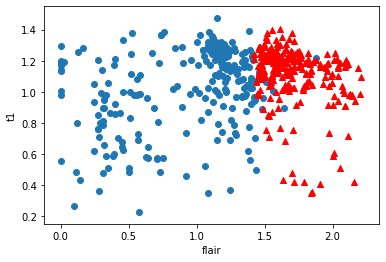

In [88]:
IND2=np.random.randint(np.shape(t1_tissue)[0], size=250)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(flair_tissue[IND2,], t1_tissue[IND2,])
ax.scatter(flair_wmh[IND2,], t1_wmh[IND2,], c='r', marker='^')
ax.set_xlabel('flair')
ax.set_ylabel('t1')
plt.show()

In [89]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,16254,16255,16256,16257,16258,16259,16260,16261,16262,16263
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1.186569,1.070091,1.337138,1.297409,1.392824,1.384269,0.922765,1.315015,0.893842,1.165108,...,0.990792,1.362479,0.911873,1.295422,1.115159,1.399424,1.295929,0.965544,1.303138,1.339927
std,0.296918,0.470782,0.226670,0.438645,0.351676,0.402779,0.748372,0.344660,0.563524,0.331796,...,0.448890,0.173833,0.609579,0.156355,0.357519,0.148408,0.242269,0.685536,0.288793,0.171129
min,0.915960,0.536673,1.141133,1.018610,1.167980,0.876219,0.210379,0.904373,0.330272,0.934661,...,0.498479,1.235125,0.252602,1.171483,0.742353,1.272249,1.002527,0.000000,0.897924,1.149740
25%,0.958063,0.774567,1.237004,1.027732,1.192205,1.203371,0.353027,1.188658,0.550711,0.966786,...,0.686644,1.238748,0.493052,1.222605,0.877768,1.301136,1.214354,0.805724,1.227624,1.258278
50%,1.141864,1.068276,1.271514,1.113484,1.244256,1.410197,0.839014,1.304326,0.803299,1.036814,...,0.987691,1.304312,0.900181,1.242892,1.082945,1.360642,1.292750,1.123025,1.368224,1.323846
75%,1.370369,1.363799,1.371648,1.383161,1.444875,1.591094,1.408752,1.430682,1.146430,1.235137,...,1.291839,1.428044,1.319003,1.315709,1.320337,1.458930,1.374324,1.282845,1.443738,1.405495
max,1.546587,1.607139,1.664390,1.944061,1.914801,1.840462,1.802653,1.747035,1.638497,1.652144,...,1.489307,1.606169,1.594527,1.524420,1.552395,1.604162,1.595690,1.616125,1.578181,1.562277
